In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mp
from matplotlib.pyplot import figure

In [2]:
#Import csvs as df
eada = pd.read_csv('../Data Transform/EADA_2019_filtered_coord.csv')
school_geo = pd.read_csv('../Data Transform/school_geo.csv')
mlb_geo = pd.read_csv('../Data Transform/dataMLB.csv')
nba_geo = pd.read_csv('../Data Transform/dataNBA.csv')

In [22]:
eada

,unitid,institution_name,addr1_txt,addr2_txt,city_txt,state_cd,zip_text,ClassificationCode,classification_name,ClassificationOther,...,GRND_TOTAL_REVENUE,GRND_TOTAL_EXPENSE,OPEXPPERTEAM_MEN_Baseball,OPEXPPERTEAM_MEN_Bskball,REV_MEN_Baseball,REV_MEN_Bskball,EXP_MEN_Baseball,EXP_MEN_Bskball,lat,lon
0,100654,Alabama A & M University,4900 Meridian Street,NaN,Normal,AL,35762.0,2,NCAA Division I-FCS,NaN,...,13790500,13626724,171178.0,184268.0,608854.0,1591652.0,588354.0,1667122.0,34.782600,-86.568700
1,100706,University of Alabama in Huntsville,301 Sparkman Dr,NaN,Huntsville,AL,35899.0,5,NCAA Division II without football,NaN,...,7781027,7781027,173401.0,143803.0,541784.0,705934.0,541784.0,705934.0,34.725000,-86.640000
2,100724,Alabama State University,915 S Jackson Street,NaN,Montgomery,AL,36104.0,2,NCAA Division I-FCS,NaN,...,11639722,11639722,72110.0,180911.0,628125.0,992694.0,628125.0,992694.0,32.364000,-86.295000
3,100751,The University of Alabama,739 University Blvd,NaN,Tuscaloosa,AL,35487.0,1,NCAA Division I-FBS,NaN,...,166812799,166812799,1166447.0,1457096.0,2016412.0,16028795.0,4173211.0,15966875.0,33.210833,-87.546111
4,100760,Central Alabama Community College,1675 Cherokee Rd,NaN,Alexander City,AL,35010.0,12,NJCAA Division I,NaN,...,906077,889789,61904.0,NaN,318500.0,NaN,308353.0,NaN,32.926230,-85.946490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,486901,Milligan College,1 Blowers Blvd.,NaN,Milligan College,TN,37682.0,10,NAIA Division II,NaN,...,5501770,5458939,60654.0,28928.0,601223.0,400392.0,601197.0,377672.0,36.301700,-82.295100
1808,487524,Husson University,1 College Circle,NaN,Bangor,ME,4401.0,6,NCAA Division III with football,NaN,...,2955721,2955721,106791.0,91996.0,142626.0,140394.0,135573.0,116686.0,44.826964,-68.793222
1809,488785,University of Saint Katherine,1637 Capalina Road,NaN,San Marcos,CA,92069.0,15,NCCAA Division I,NaN,...,2701639,2701639,48084.0,54935.0,923581.0,116259.0,504014.0,328106.0,33.048100,-117.277500
1810,489937,Piedmont International University,420 S. Broad St.,NaN,Winston-Salem,NC,27101.0,15,NCCAA Division I,NaN,...,2169500,2169500,57488.0,46276.0,402973.0,328353.0,367526.0,345939.0,36.087900,-80.250100


In [4]:
school_geo.head()

,unitid,institution_name,state_cd,lat,lon,region,nearest_mlb,nearest_mlb_dist,nearest_nba,nearest_nba_dist
0,100654,Alabama A & M University,AL,34.782600,-86.568700,ESC,Atlanta Braves,134.784204,Atlanta Hawks,142.837358
1,100706,University of Alabama in Huntsville,AL,34.725000,-86.640000,ESC,Atlanta Braves,136.725585,Atlanta Hawks,144.541163
2,100724,Alabama State University,AL,32.364000,-86.295000,ESC,Atlanta Braves,149.301421,Atlanta Hawks,146.123655
3,100751,The University of Alabama,AL,33.210833,-87.546111,ESC,Atlanta Braves,183.343203,Atlanta Hawks,185.384011
4,100760,Central Alabama Community College,AL,32.926230,-85.946490,ESC,Atlanta Braves,108.192247,Atlanta Hawks,106.309279


In [5]:
#Drop cols shared by school_geo and eada before merge
school_geo.drop(columns = ['state_cd', 'lat', 'lon'], inplace = True)

In [6]:
#Merge dfs
joined_df = eada.merge(right = school_geo, on = ['unitid', 'institution_name'])
joined_df.head()

,unitid,institution_name,addr1_txt,addr2_txt,city_txt,state_cd,zip_text,ClassificationCode,classification_name,ClassificationOther,...,REV_MEN_Bskball,EXP_MEN_Baseball,EXP_MEN_Bskball,lat,lon,region,nearest_mlb,nearest_mlb_dist,nearest_nba,nearest_nba_dist
0,100654,Alabama A & M University,4900 Meridian Street,NaN,Normal,AL,35762.0,2,NCAA Division I-FCS,NaN,...,1591652.0,588354.0,1667122.0,34.782600,-86.568700,ESC,Atlanta Braves,134.784204,Atlanta Hawks,142.837358
1,100706,University of Alabama in Huntsville,301 Sparkman Dr,NaN,Huntsville,AL,35899.0,5,NCAA Division II without football,NaN,...,705934.0,541784.0,705934.0,34.725000,-86.640000,ESC,Atlanta Braves,136.725585,Atlanta Hawks,144.541163
2,100724,Alabama State University,915 S Jackson Street,NaN,Montgomery,AL,36104.0,2,NCAA Division I-FCS,NaN,...,992694.0,628125.0,992694.0,32.364000,-86.295000,ESC,Atlanta Braves,149.301421,Atlanta Hawks,146.123655
3,100751,The University of Alabama,739 University Blvd,NaN,Tuscaloosa,AL,35487.0,1,NCAA Division I-FBS,NaN,...,16028795.0,4173211.0,15966875.0,33.210833,-87.546111,ESC,Atlanta Braves,183.343203,Atlanta Hawks,185.384011
4,100760,Central Alabama Community College,1675 Cherokee Rd,NaN,Alexander City,AL,35010.0,12,NJCAA Division I,NaN,...,NaN,308353.0,NaN,32.926230,-85.946490,ESC,Atlanta Braves,108.192247,Atlanta Hawks,106.309279


In [7]:
joined_df.columns

Index(['unitid', 'institution_name', 'addr1_txt', 'addr2_txt', 'city_txt',
       'state_cd', 'zip_text', 'ClassificationCode', 'classification_name',
       'ClassificationOther', 'EFMaleCount', 'EFFemaleCount', 'EFTotalCount',
       'sector_cd', 'sector_name', 'RECRUITEXP_MEN', 'RECRUITEXP_TOTAL',
       'GRND_TOTAL_REVENUE', 'GRND_TOTAL_EXPENSE', 'OPEXPPERTEAM_MEN_Baseball',
       'OPEXPPERTEAM_MEN_Bskball', 'REV_MEN_Baseball', 'REV_MEN_Bskball',
       'EXP_MEN_Baseball', 'EXP_MEN_Bskball', 'lat', 'lon', 'region',
       'nearest_mlb', 'nearest_mlb_dist', 'nearest_nba', 'nearest_nba_dist'],
      dtype='object')

In [8]:
joined_df['region'].value_counts()

SA     295
MA     286
ENC    245
PAC    227
WNC    173
WSC    172
ESC    127
NE     114
MNT    100
oth     20
Name: region, dtype: int64

In [9]:
#Drop colleges with region = oth
joined_df.drop(index = joined_df.loc[joined_df['region'] == 'oth'].index, inplace = True)
joined_df['region'].value_counts()

SA     295
MA     286
ENC    245
PAC    227
WNC    173
WSC    172
ESC    127
NE     114
MNT    100
Name: region, dtype: int64

In [10]:
joined_df['classification_name'].value_counts()

NCAA Division III with football       211
NJCAA Division I                      183
NCAA Division III without football    154
NCAA Division II with football        146
NCAA Division I-FCS                   116
NCAA Division II without football     115
NCAA Division I-FBS                   111
NAIA Division II                      102
NJCAA Division III                     98
NCAA Division I without football       93
CCCAA                                  92
NAIA Division I                        90
NJCAA Division II                      88
Other                                  38
USCAA                                  35
NWAC                                   29
NCCAA Division II                      23
Independent                             8
NCCAA Division I                        7
Name: classification_name, dtype: int64

In [11]:
joined_df['EFTotalCount'].describe()

count     1739.000000
mean      4340.408281
std       5900.756189
min          0.000000
25%       1103.000000
50%       2095.000000
75%       4839.500000
max      47253.000000
Name: EFTotalCount, dtype: float64

In [12]:
joined_df[['GRND_TOTAL_REVENUE', 'REV_MEN_Baseball', 'REV_MEN_Bskball']].describe()

,GRND_TOTAL_REVENUE,REV_MEN_Baseball,REV_MEN_Bskball
count,1.739000e+03,1.427000e+03,1.656000e+03
mean,1.029815e+07,4.710012e+05,1.218597e+06
std,2.367333e+07,6.608162e+05,3.386381e+06
min,8.480000e+03,1.400500e+04,8.238000e+03
25%,1.136860e+06,1.409260e+05,1.101172e+05
50%,3.265894e+06,2.672030e+05,2.487765e+05
75%,7.709202e+06,5.541115e+05,6.587408e+05
max,2.158291e+08,7.466680e+06,4.275925e+07


In [13]:
joined_df[['OPEXPPERTEAM_MEN_Baseball', 'OPEXPPERTEAM_MEN_Bskball', 'EXP_MEN_Baseball', 'EXP_MEN_Bskball']].describe()

,OPEXPPERTEAM_MEN_Baseball,OPEXPPERTEAM_MEN_Bskball,EXP_MEN_Baseball,EXP_MEN_Bskball
count,1.427000e+03,1.672000e+03,1.427000e+03,1.656000e+03
mean,1.395221e+05,2.123110e+05,5.200246e+05,1.032574e+06
std,2.165873e+05,5.069830e+05,7.821565e+05,2.330087e+06
min,2.109000e+03,0.000000e+00,1.400500e+04,6.550000e+03
25%,4.457750e+04,3.089525e+04,1.390845e+05,1.070430e+05
50%,7.449300e+04,5.210300e+04,2.662560e+05,2.447485e+05
75%,1.334720e+05,1.054132e+05,5.573875e+05,6.474565e+05
max,2.984274e+06,6.255125e+06,7.466680e+06,2.217847e+07


In [14]:
joined_df[['nearest_mlb_dist', 'nearest_nba_dist']].describe()

,nearest_mlb_dist,nearest_nba_dist
count,1739.000000,1739.000000
mean,122.004529,113.165672
std,189.683518,185.287951
min,0.251973,0.116321
25%,29.400298,35.646488
50%,95.257479,94.450053
75%,177.947819,152.400269
max,4968.412159,5067.934796


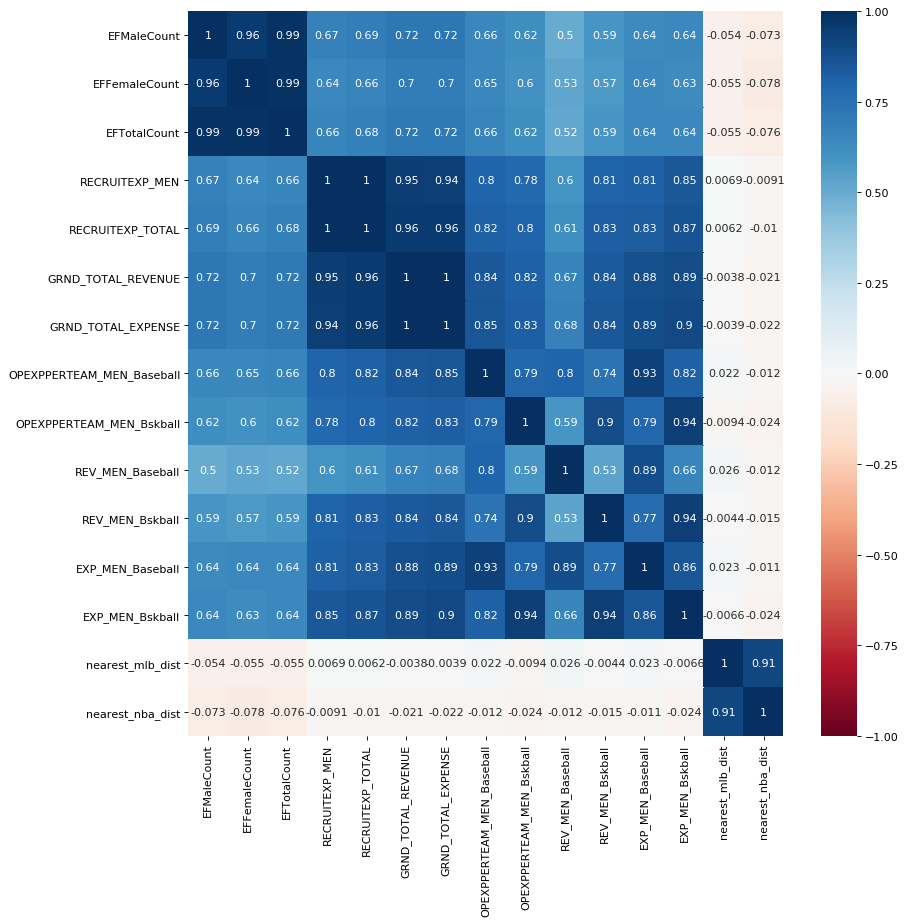

In [23]:
#Adapted from https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib;
# and https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/

#Plot heatmap for all schools 
figure(figsize = (12,12), dpi = 80)

dataplot = sb.heatmap(joined_df[['EFMaleCount', 'EFFemaleCount', 'EFTotalCount', 'RECRUITEXP_MEN', 'RECRUITEXP_TOTAL',
       'GRND_TOTAL_REVENUE', 'GRND_TOTAL_EXPENSE', 'OPEXPPERTEAM_MEN_Baseball',
       'OPEXPPERTEAM_MEN_Bskball', 'REV_MEN_Baseball', 'REV_MEN_Bskball',
       'EXP_MEN_Baseball', 'EXP_MEN_Bskball', 'nearest_mlb_dist', 'nearest_nba_dist']].corr(), 
        cmap="RdBu", annot=True, vmin = -1, vmax = 1)

mp.show()

In [28]:
#Group all schools by region
all_region = joined_df.groupby(joined_df['region']).mean()
all_region

,unitid,zip_text,ClassificationCode,EFMaleCount,EFFemaleCount,EFTotalCount,sector_cd,RECRUITEXP_MEN,RECRUITEXP_TOTAL,GRND_TOTAL_REVENUE,...,OPEXPPERTEAM_MEN_Baseball,OPEXPPERTEAM_MEN_Bskball,REV_MEN_Baseball,REV_MEN_Bskball,EXP_MEN_Baseball,EXP_MEN_Bskball,lat,lon,nearest_mlb_dist,nearest_nba_dist
region,,,,,,,,,,,,,,,,,,,,,
ENC,180642.395918,1.713642e+07,8.044898,1780.097959,2028.600000,3808.697959,2.285714,97802.528689,140922.351020,9.122132e+06,...,110789.990476,213090.210970,331340.095238,1.293882e+06,390116.557143,9.403683e+05,41.529649,-85.634009,100.468996,111.142809
ESC,171612.629921,3.143502e+06,7.543307,1667.118110,2201.913386,3869.031496,2.251969,169918.157480,234602.220472,1.418412e+07,...,193414.110169,271256.456000,661579.110169,1.971398e+06,771521.152542,1.498573e+06,34.803554,-86.784247,190.970545,135.471105
MA,204833.650350,3.392442e+06,8.318182,1888.237762,2168.076923,4056.314685,2.192308,72583.936842,108744.811189,6.715940e+06,...,86171.091703,145619.063380,269079.401747,7.613112e+05,268261.432314,6.744590e+05,41.176564,-75.927807,60.086846,70.979819
MNT,172325.320000,1.462038e+07,7.430000,2522.040000,2792.110000,5314.150000,2.230000,160516.787879,227454.750000,1.361885e+07,...,178070.516667,316127.443182,590363.966667,1.774404e+06,668496.383333,1.520988e+06,39.350187,-107.426831,222.648561,198.546334
NE,171830.078947,4.939234e+05,7.210526,1761.175439,2024.070175,3785.245614,1.973684,96259.815789,147044.342105,8.801315e+06,...,111058.783505,171984.580357,340727.072165,7.823365e+05,338717.958763,7.726722e+05,42.636739,-71.555008,69.879644,71.112176
PAC,162788.185022,8.276224e+06,11.986784,2687.299559,3216.207048,5903.506608,2.784141,79766.889868,120427.171806,8.872630e+06,...,146050.625000,175826.188940,471603.581522,9.154312e+05,529707.994565,8.792927e+05,38.595984,-119.185891,94.178563,97.523627
SA,193103.488136,1.139309e+06,6.915254,2096.071186,2632.644068,4728.715254,1.928814,156478.775087,212202.189831,1.297143e+07,...,161799.420833,263657.709677,629750.766667,1.526343e+06,691195.645833,1.327083e+06,34.721451,-80.376625,134.849862,93.717838
WNC,175754.040462,6.818778e+06,8.745665,1274.774566,1425.867052,2700.641618,2.364162,93440.976744,134085.497110,8.260496e+06,...,113027.467626,161993.491124,357764.568345,9.989482e+05,418055.568345,7.805428e+05,41.819471,-94.885895,149.028289,212.685360
WSC,203631.854651,8.489251e+06,7.302326,2076.186047,2564.250000,4640.436047,2.209302,168068.263158,229142.662791,1.346775e+07,...,202687.900000,267363.708075,711566.060000,1.438915e+06,755005.946667,1.318624e+06,32.754033,-96.151423,168.259310,101.857225


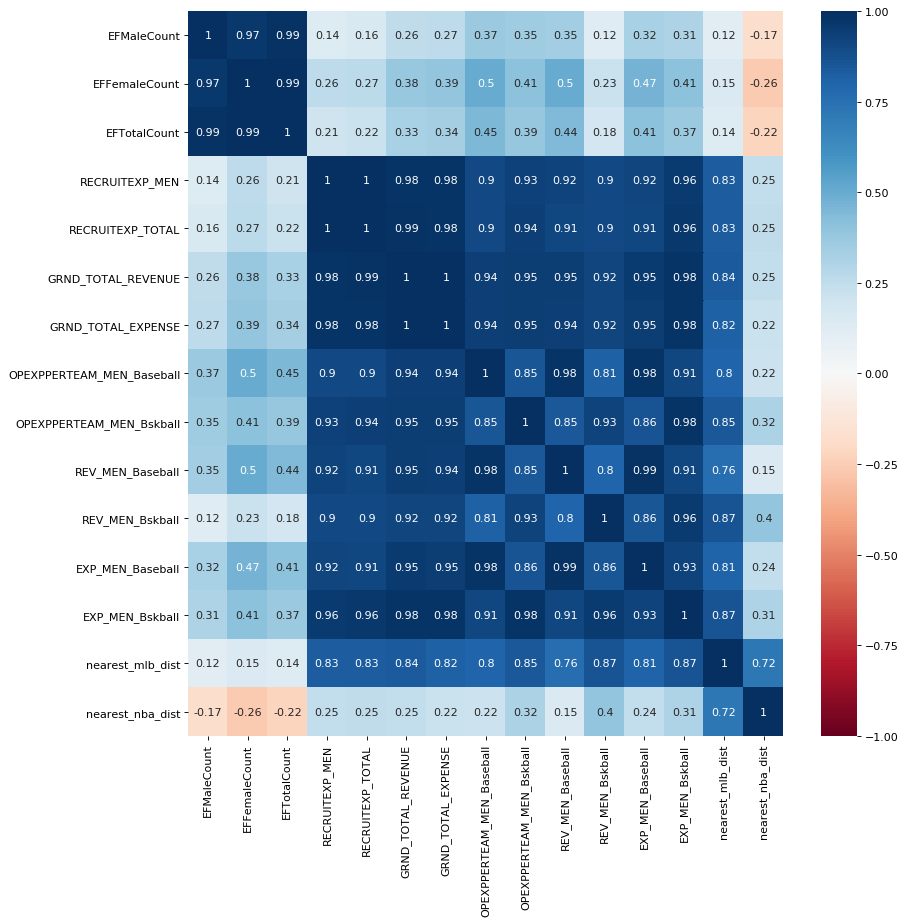

In [29]:
#Create heatmap for all schools grouped by region 
figure(figsize = (12,12), dpi = 80)

dataplot = sb.heatmap(all_region[['EFMaleCount', 'EFFemaleCount', 'EFTotalCount', 'RECRUITEXP_MEN', 'RECRUITEXP_TOTAL',
       'GRND_TOTAL_REVENUE', 'GRND_TOTAL_EXPENSE', 'OPEXPPERTEAM_MEN_Baseball',
       'OPEXPPERTEAM_MEN_Bskball', 'REV_MEN_Baseball', 'REV_MEN_Bskball',
       'EXP_MEN_Baseball', 'EXP_MEN_Bskball', 'nearest_mlb_dist', 'nearest_nba_dist']].corr(), 
        cmap="RdBu", annot=True, vmin = -1)

mp.show()

In [ ]:
#Crete df of only NCAA div 1 schools
divI = joined_df.loc[(joined_df['classification_name'] == 'NCAA Division I-FCS') | (joined_df['classification_name'] == 'NCAA Division I-FBS')]

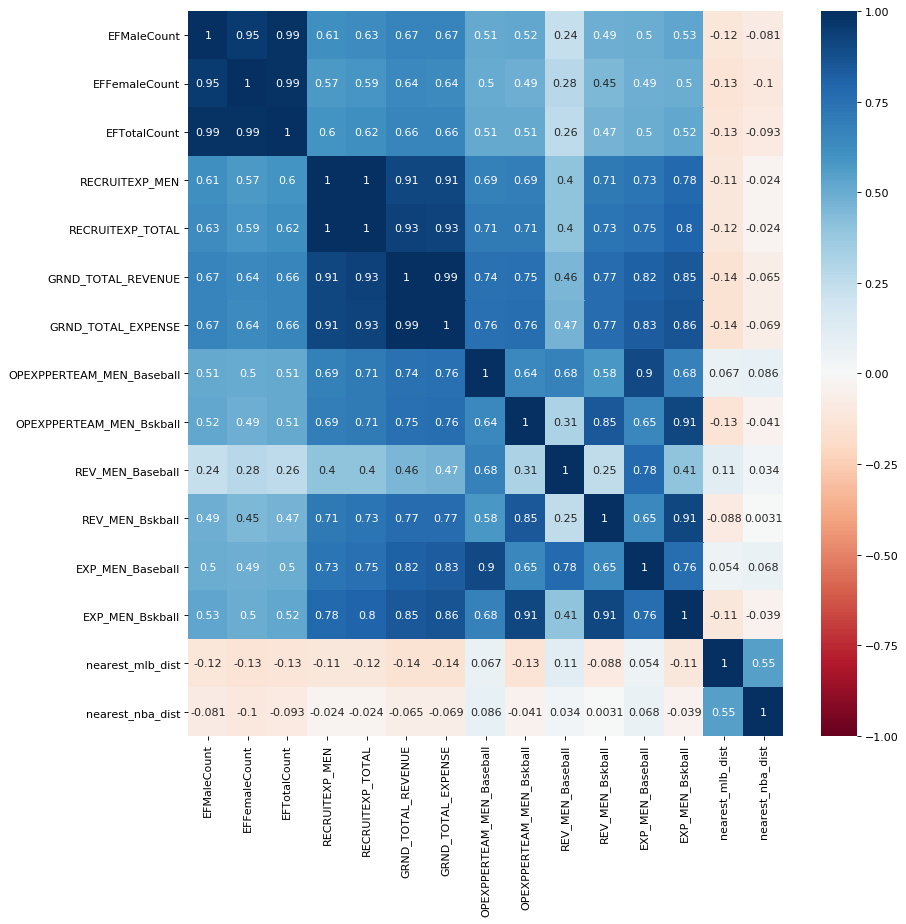

In [24]:
#Plot heatmap for only ncaa division I schools
figure(figsize = (12,12), dpi = 80)

dataplot = sb.heatmap(divI[['EFMaleCount', 'EFFemaleCount', 'EFTotalCount', 'RECRUITEXP_MEN', 'RECRUITEXP_TOTAL',
       'GRND_TOTAL_REVENUE', 'GRND_TOTAL_EXPENSE', 'OPEXPPERTEAM_MEN_Baseball',
       'OPEXPPERTEAM_MEN_Bskball', 'REV_MEN_Baseball', 'REV_MEN_Bskball',
       'EXP_MEN_Baseball', 'EXP_MEN_Bskball', 'nearest_mlb_dist', 'nearest_nba_dist']].corr(), 
        cmap="RdBu", annot=True, vmin = -1)

mp.show()

In [17]:
#Group by region
divI_region = divI.groupby(divI['region']).mean()
divI_region

,unitid,zip_text,ClassificationCode,EFMaleCount,EFFemaleCount,EFTotalCount,sector_cd,RECRUITEXP_MEN,RECRUITEXP_TOTAL,GRND_TOTAL_REVENUE,...,OPEXPPERTEAM_MEN_Baseball,OPEXPPERTEAM_MEN_Bskball,REV_MEN_Baseball,REV_MEN_Bskball,EXP_MEN_Baseball,EXP_MEN_Bskball,lat,lon,nearest_mlb_dist,nearest_nba_dist
region,,,,,,,,,,,,,,,,,,,,,
ENC,163870.904762,3.000246e+07,1.380952,7225.809524,7688.190476,14914.000000,1.238095,744421.333333,1.029580e+06,6.230115e+07,...,452790.500000,1.166956e+06,8.423349e+05,8.630769e+06,1.495455e+06,5.405611e+06,41.033896,-86.666295,83.758051,79.283723
ESC,165550.034483,3.820893e+04,1.517241,4584.793103,5795.517241,10380.310345,1.034483,673048.793103,9.109724e+05,4.878598e+07,...,549478.111111,9.196057e+05,1.480604e+06,7.049561e+06,1.981421e+06,5.012327e+06,34.827158,-86.896357,190.418499,139.904467
MA,201702.608696,1.402835e+04,1.782609,5422.565217,5610.739130,11033.304348,1.739130,586201.173913,8.239018e+05,4.164173e+07,...,273048.125000,8.731277e+05,9.400212e+05,5.134964e+06,9.859470e+05,4.102929e+06,41.067103,-75.771780,58.857227,72.172025
MNT,175904.761905,2.851537e+07,1.380952,7269.285714,7936.142857,15205.428571,1.047619,628146.047619,8.734856e+05,4.643023e+07,...,493685.400000,9.326167e+05,1.182861e+06,5.390919e+06,1.698218e+06,4.332697e+06,40.042745,-110.441190,260.769744,173.523801
NE,167559.230769,3.832000e+03,1.769231,4279.384615,4428.769231,8708.153846,1.615385,545823.153846,7.836192e+05,3.672374e+07,...,294921.461538,7.770462e+05,9.428116e+05,3.010507e+06,9.418263e+05,2.979197e+06,42.246638,-71.786696,64.777722,67.212170
PAC,160983.823529,9.503371e+04,1.352941,9369.941176,11030.647059,20400.588235,1.176471,753556.352941,1.078675e+06,6.853344e+07,...,660248.800000,1.110980e+06,1.477732e+06,5.435450e+06,2.334393e+06,5.363245e+06,39.499146,-120.410194,95.053540,90.126407
SA,190462.839286,2.744605e+04,1.535714,5774.125000,6962.803571,12736.928571,1.339286,688248.946429,9.170038e+05,4.945790e+07,...,431015.134615,9.614033e+05,1.525169e+06,5.488430e+06,1.830772e+06,4.598670e+06,34.829396,-80.000993,142.069537,94.860787
WNC,174705.583333,5.769783e+04,1.500000,7023.916667,7366.500000,14390.416667,1.083333,874844.750000,1.211217e+06,6.334816e+07,...,634342.571429,1.284261e+06,6.827770e+05,8.410498e+06,1.953991e+06,5.569384e+06,41.851262,-94.083472,151.603434,206.812471
WSC,196591.457143,7.495186e+04,1.428571,5929.800000,7049.885714,12979.685714,1.257143,716359.314286,9.529965e+05,5.245340e+07,...,599066.870968,9.275865e+05,1.959476e+06,5.100772e+06,2.156689e+06,4.553402e+06,31.611991,-95.367771,161.628194,96.628375


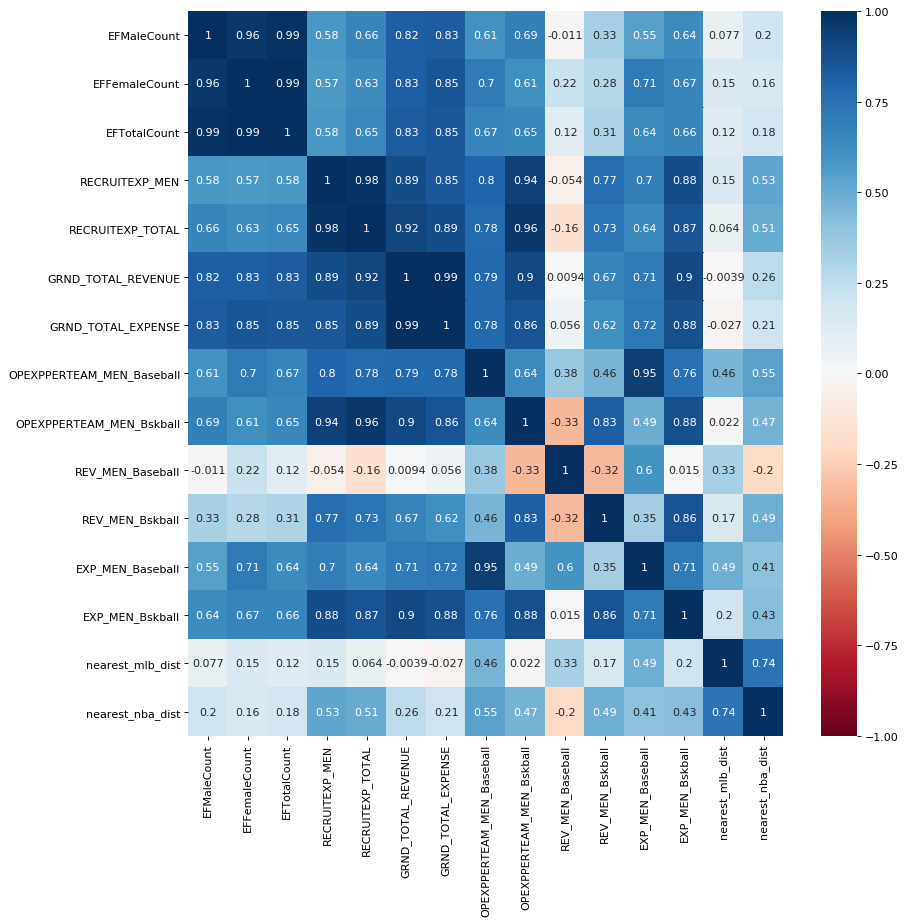

In [25]:
#Create heatmap for ncaa division 1 grouped by region
figure(figsize = (12,12), dpi = 80)

dataplot = sb.heatmap(divI_region[['EFMaleCount', 'EFFemaleCount', 'EFTotalCount', 'RECRUITEXP_MEN', 'RECRUITEXP_TOTAL',
       'GRND_TOTAL_REVENUE', 'GRND_TOTAL_EXPENSE', 'OPEXPPERTEAM_MEN_Baseball',
       'OPEXPPERTEAM_MEN_Bskball', 'REV_MEN_Baseball', 'REV_MEN_Bskball',
       'EXP_MEN_Baseball', 'EXP_MEN_Bskball', 'nearest_mlb_dist', 'nearest_nba_dist']].corr(), 
        cmap="RdBu", annot=True, vmin = -1)

mp.show()

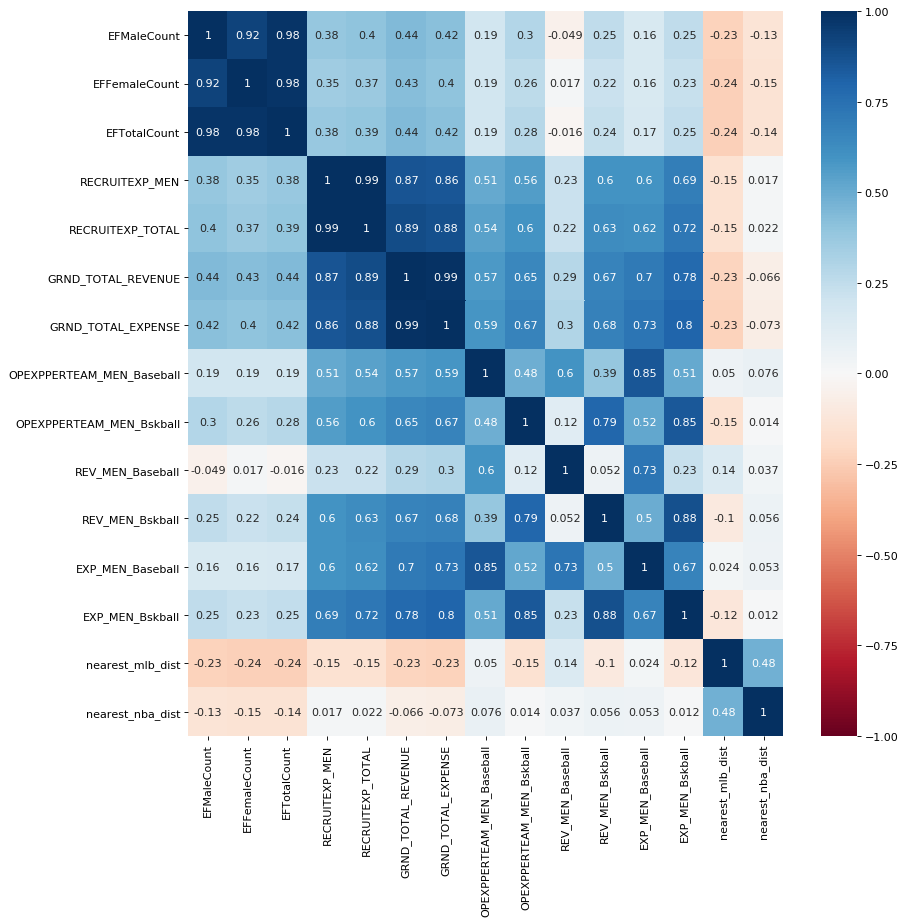

In [26]:
#Create heatmap for ncaa d1 FBS schools 
divI_fbs = joined_df.loc[joined_df['classification_name'] == 'NCAA Division I-FBS']

figure(figsize = (12,12), dpi = 80)

dataplot = sb.heatmap(divI_fbs[['EFMaleCount', 'EFFemaleCount', 'EFTotalCount', 'RECRUITEXP_MEN', 'RECRUITEXP_TOTAL',
       'GRND_TOTAL_REVENUE', 'GRND_TOTAL_EXPENSE', 'OPEXPPERTEAM_MEN_Baseball',
       'OPEXPPERTEAM_MEN_Bskball', 'REV_MEN_Baseball', 'REV_MEN_Bskball',
       'EXP_MEN_Baseball', 'EXP_MEN_Bskball', 'nearest_mlb_dist', 'nearest_nba_dist']].corr(), 
        cmap="RdBu", annot=True, vmin = -1)

# displaying heatmap
mp.show()

In [20]:
#Group fbs schools by region
divI_fbs_region = divI_fbs.groupby(divI['region']).mean()
divI_fbs_region

,unitid,zip_text,ClassificationCode,EFMaleCount,EFFemaleCount,EFTotalCount,sector_cd,RECRUITEXP_MEN,RECRUITEXP_TOTAL,GRND_TOTAL_REVENUE,...,OPEXPPERTEAM_MEN_Baseball,OPEXPPERTEAM_MEN_Bskball,REV_MEN_Baseball,REV_MEN_Bskball,EXP_MEN_Baseball,EXP_MEN_Bskball,lat,lon,nearest_mlb_dist,nearest_nba_dist
region,,,,,,,,,,,,,,,,,,,,,
ENC,168847.923077,51055.307692,1.0,9542.538462,9966.461538,19509.000000,1.153846,1.059318e+06,1.439289e+06,8.723235e+07,...,562756.250000,1.445949e+06,7.542082e+05,1.114492e+07,1.802023e+06,6.808959e+06,41.770948,-86.008630,73.853538,65.168819
ESC,163747.357143,38312.142857,1.0,6844.571429,8327.642857,15172.214286,1.071429,1.250532e+06,1.678781e+06,8.765182e+07,...,916679.071429,1.606102e+06,2.263182e+06,1.297745e+07,3.234000e+06,8.907195e+06,34.554297,-87.041115,196.695246,133.326573
MA,201999.400000,14465.800000,1.0,13596.000000,13238.200000,26834.200000,1.200000,1.230064e+06,1.631149e+06,8.888354e+07,...,565605.500000,1.533726e+06,1.323839e+06,1.260758e+07,1.845554e+06,7.863152e+06,41.465631,-76.481300,75.467382,78.947501
MNT,181079.461538,83676.384615,1.0,9027.615385,9436.384615,18464.000000,1.076923,8.784284e+05,1.199670e+06,6.359413e+07,...,524534.666667,1.239927e+06,1.255971e+06,7.667540e+06,1.828590e+06,5.899254e+06,38.793924,-109.493796,232.745997,155.730983
NE,153524.333333,3246.333333,1.0,8184.333333,8358.666667,16543.000000,1.333333,9.149693e+05,1.251598e+06,6.726049e+07,...,520460.333333,1.874502e+06,1.551371e+06,6.859097e+06,1.551371e+06,6.741384e+06,42.177037,-71.983519,48.933885,50.990989
PAC,167063.818182,94765.090909,1.0,10325.818182,11855.909091,22181.727273,1.181818,1.038240e+06,1.467204e+06,9.228495e+07,...,778314.818182,1.455634e+06,1.512192e+06,7.236115e+06,2.680366e+06,7.124525e+06,39.391665,-120.516684,86.699962,87.445008
SA,186307.884615,28463.461538,1.0,9389.423077,10878.153846,20267.576923,1.153846,1.220997e+06,1.601420e+06,8.327116e+07,...,640407.423077,1.535967e+06,2.091728e+06,9.169483e+06,2.711963e+06,7.275951e+06,34.101392,-80.440961,147.011271,100.175603
WNC,161739.833333,59245.000000,1.0,11046.833333,11066.333333,22113.166667,1.000000,1.544702e+06,2.105089e+06,1.084832e+08,...,807242.000000,2.056957e+06,6.828768e+05,1.465360e+07,2.462577e+06,8.956179e+06,40.959591,-93.762914,113.088232,205.400770
WSC,202802.350000,75259.500000,1.0,8591.250000,9447.250000,18038.500000,1.300000,1.129409e+06,1.493981e+06,8.070189e+07,...,953919.187500,1.405136e+06,3.008504e+06,7.987042e+06,3.394533e+06,7.034492e+06,31.925891,-96.189212,162.570524,97.716864


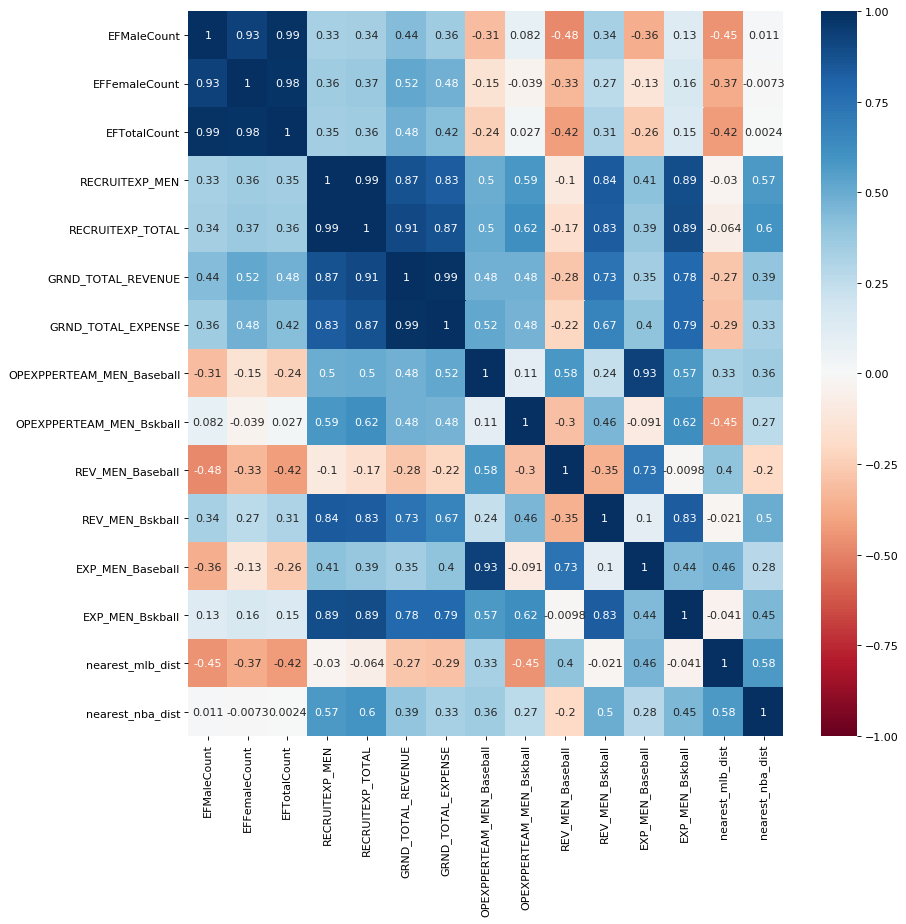

In [27]:
#Create heatmap for d1 fbs schools grouped by region
figure(figsize = (12,12), dpi = 80)

dataplot = sb.heatmap(divI_fbs_region[['EFMaleCount', 'EFFemaleCount', 'EFTotalCount', 'RECRUITEXP_MEN', 'RECRUITEXP_TOTAL',
       'GRND_TOTAL_REVENUE', 'GRND_TOTAL_EXPENSE', 'OPEXPPERTEAM_MEN_Baseball',
       'OPEXPPERTEAM_MEN_Bskball', 'REV_MEN_Baseball', 'REV_MEN_Bskball',
       'EXP_MEN_Baseball', 'EXP_MEN_Bskball', 'nearest_mlb_dist', 'nearest_nba_dist']].corr(), 
        cmap="RdBu", annot=True, vmin = -1)

# displaying heatmap
mp.show()